In [14]:
import rl.environments
from os.path import join
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import yaml, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = pathlib.Path().absolute()

## For the different designs with imi
to_combine=[
    ['ConveyorEnv1','20210110_1000'],  #1x2
    ['ConveyorEnv1','20210110_1100'],  #2x2 
    ['ConveyorEnv1','20210110_1200'],  #2x3
    ['ConveyorEnv1','20210110_1300'],  #3x3
    ['ConveyorEnv1','20210110_1400'],  #4x3
    ['ConveyorEnv1','20210110_1500']   #5x3
    
]

## For the buffer size - with pre-training
# to_combine=[
#     ['ConveyorEnv11','20210108_1400'], #1
#     ['ConveyorEnv11','20210108_1500'], #2
#     ['ConveyorEnv11','20210108_1600'], #3
#     ['ConveyorEnv11','20210108_1700'], #4
#     ['ConveyorEnv11','20210108_1800'], #5
#     ['ConveyorEnv11','20210108_1900'], #6
#     ['ConveyorEnv11','20210108_2000'], #7
#     ['ConveyorEnv11','20210108_2100'], #8
#     ['ConveyorEnv11','20210108_2200'], #9
#     ['ConveyorEnv11','20210108_2300'] #10
    
# ]

# ## for the buffer size without pre-training 
# to_combine=[
#     ['ConveyorEnv11','20210110_0000'], #1
#     ['ConveyorEnv11','20210110_0100'], #2
#     ['ConveyorEnv11','20210110_0200'], #3
#     ['ConveyorEnv11','20210110_0300'], #4
#     ['ConveyorEnv11','20210110_0400'], #5
#     ['ConveyorEnv11','20210110_0500'], #6
#     ['ConveyorEnv11','20210110_0600'], #7
#     ['ConveyorEnv11','20210110_0700'], #8
#     ['ConveyorEnv11','20210110_0800'], #9
#     ['ConveyorEnv11','20210110_0900'] #10
    
# ]

In [15]:
env1, subdir = to_combine[0]
episodes = 100
#combinations = ['2x2', '2x2_pretrained', '2x2_sto', '2x2_sto_gamma_adjust', '2x2_sto_only_punish', '2x2_sto_only_punish_lowerR']
combinations = ['1x2', '2x2', '2x3', '3x3', '4x3', '5x3']
#combinations = ['buffersize_{:02d}'.format(i+1) for i in range(11)]
#combinations = ['pipeline_{}'.format(i+1) for i in range(10,55,5)]

results = {}
for idx, combination in enumerate(to_combine):
    env1, subdir = combination
    # load config and variables needed
    location_path= join(path, 'rl', 'trained_models', env1, subdir)
    with open(join(location_path, 'config.yml'), 'r') as c:
        config = yaml.load(c)
        print('\nLoaded config file from: {}\n'.format(join(location_path, 'config.yml')))
    model_config = config['models']['PPO2']

    #initialize env with the config file
    env_obj = getattr(rl.environments, env1)
    env = env_obj(config)
 

    # load best model from path
    model = PPO2.load(join(location_path, 'pretrained-model.zip'), env=DummyVecEnv([lambda: env]))


    results[combinations[idx]] = {}
    results[combinations[idx]]['idle_time'] = 0
    results[combinations[idx]]['cycle_count'] = 0
    results[combinations[idx]]['steps'] = 0
    results[combinations[idx]]['items_processed'] = 0

    for episode in range(episodes):
        # Run an episode
        state = env.reset()
        done = False
        while not done:
            action, _ = model.predict(state, deterministic=True)
            state, reward, done, tc = env.step(action)
        results[combinations[idx]]['idle_time'] += sum(env.idle_times_operator.values())
        results[combinations[idx]]['cycle_count'] += env.cycle_count
        results[combinations[idx]]['steps'] += env.steps
        results[combinations[idx]]['items_processed'] += env.items_processed
    results[combinations[idx]]['idle_time'] = results[combinations[idx]]['idle_time'] / episodes
    results[combinations[idx]]['cycle_count'] = results[combinations[idx]]['cycle_count'] /episodes
    results[combinations[idx]]['steps'] = results[combinations[idx]]['steps'] /episodes
    results[combinations[idx]]['items_processed'] = results[combinations[idx]]['items_processed'] /episodes

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  



Loaded config file from: D:\Drive\git\RL\rl\trained_models\ConveyorEnv1\20210110_1000\config.yml



c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  



Loaded config file from: D:\Drive\git\RL\rl\trained_models\ConveyorEnv1\20210110_1100\config.yml



c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  



Loaded config file from: D:\Drive\git\RL\rl\trained_models\ConveyorEnv1\20210110_1200\config.yml



c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  



Loaded config file from: D:\Drive\git\RL\rl\trained_models\ConveyorEnv1\20210110_1300\config.yml



c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  



Loaded config file from: D:\Drive\git\RL\rl\trained_models\ConveyorEnv1\20210110_1400\config.yml



c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  



Loaded config file from: D:\Drive\git\RL\rl\trained_models\ConveyorEnv1\20210110_1500\config.yml



In [16]:
resultcsv = pd.DataFrame.from_dict(results).T
resultcsv.to_csv('evaluation_results/results_designs_pretrain.csv')
#resultcsv.to_csv('evaluation_results/results_DRL_buffer_imi.csv')
#resultcsv['idle_percent'] = resultcsv.idle_time/resultcsv.steps * 100
#resultcsv['orders_processed'] = [50, 150, 150,250,350, 450]
#resultcsv['cycle_percent'] = resultcsv.cycle_count/resultcsv.orders_processed * 100
#resultcsv = resultcsv.reset_index()
resultcsv

,idle_time,cycle_count,steps,items_processed
1x2,0.29,0.25,1558.59,81.00
2x2,0.00,0.48,766.92,81.01
2x3,138.32,13.16,1407.26,80.28
3x3,552.93,50.62,1073.80,78.96
4x3,551.30,59.10,804.63,80.07
5x3,1730.53,121.42,871.86,78.01


In [43]:
## From the buffer size compared
resultcsv = pd.DataFrame.from_dict(results).T
resultcsv.to_csv('evaluation_results/results_DRL_buffer_imi.csv')
#resultcsv['idle_percent'] = resultcsv.idle_time/resultcsv.steps * 100
#resultcsv['orders_processed'] = [50, 150, 150,250,350, 450]
#resultcsv['cycle_percent'] = resultcsv.cycle_count/resultcsv.orders_processed * 100
#resultcsv = resultcsv.reset_index()
resultcsv

,idle_time,cycle_count,steps,items_processed
buffersize_1,161.13,155.39,1527.55,151.02
buffersize_2,183.34,125.95,1521.66,151.02
buffersize_3,39.03,42.35,1460.88,151.03
buffersize_4,3.82,1.53,1424.48,151.02
buffersize_5,16.85,4.78,1442.42,151.04
buffersize_6,0.33,0.57,1430.71,151.04
buffersize_7,0.00,2.88,1436.79,151.03
buffersize_8,0.02,2.34,1423.12,151.04
buffersize_9,0.00,0.55,1444.86,151.01
buffersize_10,0.00,0.78,1442.44,151.01


# queue occupation

In [22]:
env1, subdir = to_combine[0]
episodes = 10
#combinations = ['1x2', '2x2', '2x3', '3x3', '4x3', '5x3']

to_combine=[
    ['AbstractConveyor2','20201217_1400'],
    ['AbstractConveyor2','20201217_1500'],
    ['AbstractConveyor2','20201217_1600'],
    ['AbstractConveyor2','20201217_1700'],
    ['AbstractConveyor2','20201217_1800'],
    ['AbstractConveyor2','20201217_1900'],
    ['AbstractConveyor2','20201217_2000'],
    ['AbstractConveyor2','20201217_2100'],
    ['AbstractConveyor2','20201217_2200'],
    ['AbstractConveyor2','20201217_2300']
    
]

results = {}
for idx, combination in enumerate(to_combine):
    env1, subdir = combination
    # load config and variables needed
    location_path= join(path, 'rl', 'trained_models', env1, subdir)
    with open(join(location_path, 'config.yml'), 'r') as c:
        config = yaml.load(c)
        print('\nLoaded config file from: {}\n'.format(join(location_path, 'config.yml')))
    model_config = config['models']['PPO2']

    #initialize env with the config file
    env_obj = getattr(rl.environments, env1)
    env = env_obj(config)

    # load best model from path
    model = PPO2.load(join(location_path, 'model.zip'), env=DummyVecEnv([lambda: env]))




    log_data=[]
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action, _ = model.predict(state, deterministic=False)
            state, reward, done, tc = env.step(action)
            log_data.append(env.len_queues)
    log_dataframe = pd.DataFrame(np.array(log_data)).reset_index()
    for i in range(env.amount_of_gtps):
        print('mean: ', log_dataframe[i].mean(), 'std: ', log_dataframe[i].std())

    labels = ['Queue 1', 'Queue 2', 'Queue 3', 'Queue 4', 'Queue 5']
    plt.boxplot([log_dataframe[i] for i in range(env.amount_of_gtps)], notch=True, labels=[label for label in labels][:env.amount_of_gtps], showfliers=False)
    plt.ylim(0,1)
    plt.ylabel('Queue occupation %')
    plt.xlabel('Queue number')
    plt.title('Occupation of queues for a {}x{} design'.format(env.amount_of_gtps, env.amount_of_outputs))
    plt.savefig('figures/box_rl_queues_{}x{}.png'.format(env.amount_of_gtps, env.amount_of_outputs))
    plt.show()
  


Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor2\20201217_1400\config.yml



c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


AttributeError: module 'rl.environments' has no attribute 'AbstractConveyor2'

In [40]:
self.diverter_locations[workstation][0]

20

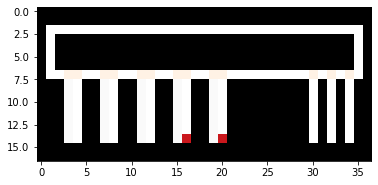

In [38]:
env.render_plt()

In [12]:
def get_env_type(env_name):
    """
    Get the type of environment from the env_name string
    """
    try:
        env = gym.make(env_name)
        del env
        return 'gym'
    except:
        return 'rl'

In [14]:
def make_rl(**kwargs):
    """
    Decorator for custom RL environments
    """
    def _init():
        env_obj = getattr(rl.environments, env_name)
        env = env_obj(config)
        return env
    return _init

def make_gym(rank, seed=0, **kwargs):
    """
    Decorator for gym environments
    """
    def _init():
        env = gym.make(env_name)
        env.seed(seed + rank)
        return env
    return _init

In [30]:
env_name = 'ConveyorEnv'
n_workers = 8
env_obj = getattr(rl.environments, env_name)
env = env_obj(config)

# multiprocess environment
env8 = [env for _ in range(n_workers)]

In [32]:
from rl.baselines.Wrapper import create_env

INFO:tensorflow:TensorFlow


In [34]:
env8 = create_env(env_name, config=config, n_workers=8)

In [35]:
env8